<a href="https://colab.research.google.com/github/cstecker/comparative_politics/blob/main/03_Parteien%2C_Wahlen_und_Regierungen.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Parteien, Wahlen und Regierungen**

In dieser Lektion beschäftigen wir uns mit Daten zu Parteien, Wahlen und Regierungen. Dazu gibt es verschiedene Datensätze, einen der umfangreichsten hat das [ParlGov project](https://www.parlgov.org/) zusammengetragen.
Unter [Data](https://www.parlgov.org/data-info/) kann man sich die einzelnen Datenquellen ansehen. Diese liegen für Parteien, Wahlen und Kabinette getrennt vor, welche wiederum über ids miteinander verknüpft werden können.
Wir lesen uns zunächst die unterschiedlichen Datensätze ein und werfen einen Blick darauf.

In [2]:
# setup
library(tidyverse)
library(readr)

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.4.1     ✔ purrr   1.0.1
✔ tibble  3.1.8     ✔ dplyr   1.1.0
✔ tidyr   1.3.0     ✔ stringr 1.4.1
✔ readr   2.1.4     ✔ forcats 1.0.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



In [ ]:
# Rohdaten von Parlgov einlesen
parties <- read_csv("https://parlgov.org/data/parlgov-development_csv-utf-8/view_party.csv",
                    locale = locale(encoding = "ISO-8859-1"))                
elections <- read_csv("https://parlgov.org/data/parlgov-development_csv-utf-8/view_election.csv",
                      locale = locale(encoding = "ISO-8859-1"))
cabinets <- read_csv("https://parlgov.org/data/parlgov-development_csv-utf-8/view_cabinet.csv",
                     locale = locale(encoding = "ISO-8859-1"))

In [ ]:
# Blick in die Daten
glimpse(parties)

parties %>%
  filter(country_name == "Germany")

In [13]:
# merge elections, cabinets, parties
parlgov <- elections %>% 
  left_join(cabinets, by = c("election_date", "party_id"), suffix = c("", ".y")) %>%  
  left_join(parties, by = "party_id", suffix = c("", ".z")) %>% 
  select(-contains(".y"), -contains(".z"))

glimpse(parlgov)

parlgov %>%
  filter(country_name == "Germany", election_date == "2021-09-26")

Warning message in left_join(., cabinets, by = c("election_date", "party_id"), suffix = c("", :
“Each row in `x` is expected to match at most 1 row in `y`.
ℹ Row 1 of `x` matches multiple rows.
ℹ If multiple matches are expected, set `multiple = "all"` to silence this
  warning.”


Rows: 14,921
Columns: 38
$ country_name_short              <chr> "AUS", "AUS", "AUS", "AUS", "AUS", "AU…
$ country_name                    <chr> "Australia", "Australia", "Australia",…
$ election_type                   <chr> "parliament", "parliament", "parliamen…
$ election_date                   <date> 1901-03-30, 1901-03-30, 1901-03-30, 1…
$ vote_share                      <dbl> 44.4, 44.4, 34.2, 34.2, 19.4, 19.4, 1.…
$ seats                           <dbl> 32, 32, 26, 26, 15, 15, 1, 1, 1, 1, 26…
$ seats_total                     <dbl> 75, 75, 75, 75, 75, 75, 75, 75, 75, 75…
$ party_name_short                <chr> "PP", "PP", "FTP", "FTP", "ALP", "ALP"…
$ party_name                      <chr> "Protectionist Party", "Protectionist …
$ party_name_english              <chr> "Protectionist Party", "Protectionist …
$ left_right                      <dbl> 7.4000, 7.4000, 6.0000, 6.0000, 3.8833…
$ country_id                      <dbl> 33, 33, 33, 33, 33, 33, 33, 33, 33, 33…
$ election_id  

country_name_short,country_name,election_type,election_date,vote_share,seats,seats_total,party_name_short,party_name,party_name_english,⋯,eu_anti_pro,cmp,euprofiler,ees,castles_mair,huber_inglehart,ray,benoit_laver,chess,family_id
<chr>,<chr>,<chr>,<date>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
DEU,Germany,parliament,2021-09-26,25.74,206,736,SPD,Sozialdemokratische Partei Deutschlands,Social Democratic Party of Germany,⋯,7.9318,41320,120,1276320,803,1503,302,6087,302,11
DEU,Germany,parliament,2021-09-26,18.90,152,736,CDU,Christlich Demokratische Union,Christian Democratic Union,⋯,8.5024,41521,116,1276521,805,1505,301,5943,301,3
DEU,Germany,parliament,2021-09-26,14.75,118,736,B90/Gru,BÃ¼ndnis 90 / Die GrÃ¼nen,Alliance 90 / Greens,⋯,7.6101,41113,115,1276113,802,1502,305,6015,304,19
DEU,Germany,parliament,2021-09-26,11.46,92,736,FDP,Freie Demokratische Partei,Free Democratic Party,⋯,8.4855,41420,119,1276420,804,1504,303,5997,303,6
DEU,Germany,parliament,2021-09-26,10.34,83,736,AfD,Alternative fÃ¼r Deutschland,Alternative for Germany,⋯,2.3000,NA,NA,NA,NA,NA,NA,NA,NA,40
DEU,Germany,parliament,2021-09-26,5.17,45,736,CSU,Christlich Soziale Union,Christian Social Union,⋯,6.6680,41521,117,1276521,806,1506,309,5943,308,3
DEU,Germany,parliament,2021-09-26,4.89,39,736,PDS|Li,PDS | Die Linke,PDS | The Left,⋯,4.3508,41221,NA,NA,NA,1501,307,6051,306,14
DEU,Germany,parliament,2021-09-26,0.12,1,736,SSW,SÃ¼dschleswigscher WÃ¤hlerverband,South Schleswig Voter League,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,16
DEU,Germany,parliament,2021-09-26,2.43,0,736,FW,Freie WÃ¤hler,Free Voters,⋯,7.9000,NA,121,NA,NA,NA,NA,NA,NA,26


## Positionen darstellen

Positionen/Koalitionsoptionen

In [23]:
# Welche Daten zu Parteipositionen gibt es und wie sind diese skaliert?
parlgov %>%
  filter(country_name == "Germany") %>%
  distinct(party_name_short, left_right, state_market, liberty_authority, eu_anti_pro)

fivenum(parlgov$state_market)

party_name_short,left_right,state_market,liberty_authority,eu_anti_pro
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
SPD,3.6451,3.8443,3.9791,7.9318
DDP,6.0000,6.7000,3.6000,8.7000
DZ,6.2000,5.7000,7.1000,8.3000
DNVP,8.8000,5.9000,8.5000,2.3000
DVP,7.4000,6.4000,6.9000,7.9000
USPD,1.3000,1.4000,3.0000,3.3000
BVP,6.2000,5.7000,7.1000,8.3000
BBB,6.0000,6.7000,3.6000,8.7000
DHP,7.4000,6.4000,6.9000,7.9000


[1] 0.2143 3.5000 5.2047 6.4000 9.4737

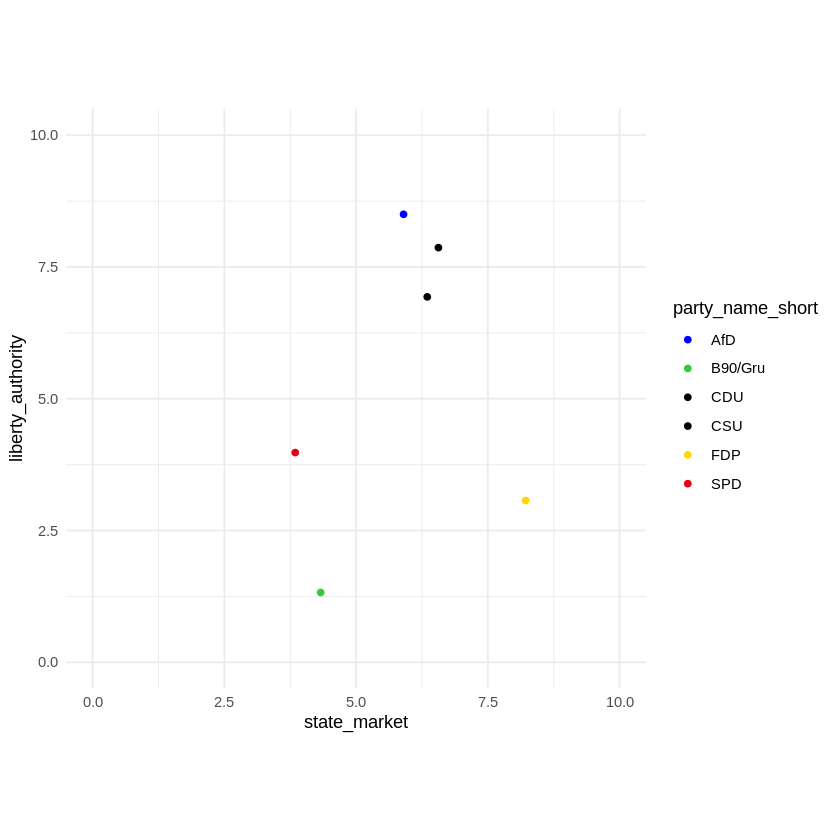

In [29]:
parlgov %>%
  filter(country_name == "Germany", election_date == "2021-09-26", vote_share >= 5) %>%
  ggplot(aes(x = state_market, y = liberty_authority, color = party_name_short)) +
  geom_point() +
  scale_color_manual(values = c("blue", "#32CD32", "black", "black", "#FFD600", "#E3000F")) +
  coord_fixed(ratio = 1, xlim = c(0, 10), y = c(0, 10)) +
  theme_minimal()
  

## Effektive legislative/elektorale Parteienanzahl & Disproportionalität
